In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_1.csv', index_col=0)
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


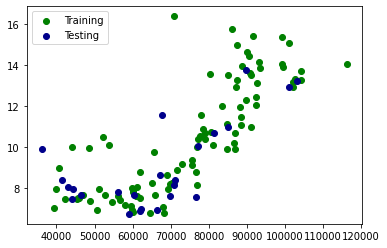

In [2]:
#split the dataset into response, y, and features, x
y = df['ZAR/USD']
X = df.drop('ZAR/USD', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#plot the results
plt.scatter(X_train, y_train, color='green', label='Training')

#plot the training data set in green 
plt.scatter(X_test, y_test, color='darkblue', label='Testing')

#plot the testing data in blue
plt.legend()
plt.show()

In [3]:
#declare model object
lm = LinearRegression()

#fit the model to the training data (training the model)
lm.fit(X_train, y_train)

#extract the intercept or y-cut of our linear model
a = float(lm.intercept_)

#extract the gradient or coefficient of our linear model
b = lm.coef_

print("Slope:\t\t", b)
print("Intercept:\t", float(a))


Slope:		 [0.0001199]
Intercept:	 1.4542630444144802


Using **predict()** method on our model to predict **y-values(ZAR/USD Exchange Rate)** from the x-values(Value of Exports) in the training set

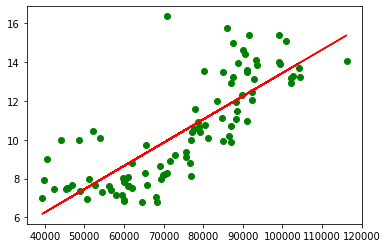

Training:
MSE: 2.6125475375589073
R_Squared 0.6402293095045937


In [4]:
#generate the values that fall within our regression line
gen_y = lm.predict(X_train)

#plot the results
plt.scatter(X_train, y_train, color='green') #training data in green

plt.plot(X_train, gen_y, color='red') #line connecting the generated y-values
plt.show()

print("Training:")
#calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
#R squared metric
print("R_Squared", metrics.r2_score(y_train, gen_y))

**Testing the model on unseen data**

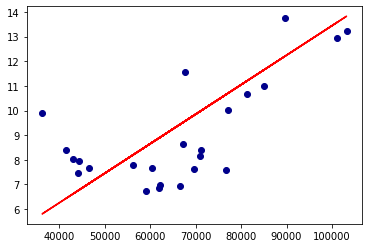

Testing:
MSE: 3.038981977599916
R_Squared: 0.30031043412578884


In [5]:
#generate values of y from x using the linear model
gen_y_test = lm.predict(X_test)

#plot the results
plt.scatter(X_test, y_test, color='darkblue') #plot testing data in blue

plt.plot(X_test, gen_y_test, color='red')
#plot the line connecting generated y-values in red
plt.show()

#check MSE and R Squared

print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_Squared:', metrics.r2_score(y_test, gen_y_test))

**Poor predictive accuracy** since MSE is higher on the **Testing set** than the **Training set**. The model underfits test data but fits too well train data.(discrepancies between the two.)

Investigating any correlation between ZAR/USD and Value of Exports variables.

In [10]:
exchange_rate = df["ZAR/USD"]
exports = df["Value of Exports (ZAR)"]
correlation = exports.corr(exchange_rate)
print(correlation)

0.784755852281218


There is a **78.4%** correlation between Exchange rate and the value of exports, thus we can't say for certain that the value of exports is proportional to the ZAR/USD exchange rate.